In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
days=np.array([5, 10, 15, 21, 42])
results=np.array([0.003432, 0.005882, 0.009005, 0.011708, 0.02392])
bench=np.array([0.003088, 0.004443, 0.00651, 0.00991, 0.020797])

In [3]:
results=(1 + results)**(252/days) - 1
bench=(1 + bench)**(252/days) - 1

In [4]:
print(results)
print(bench)

[0.18848175 0.15927194 0.16253958 0.14990566 0.15238118]
[0.16811974 0.11819481 0.11517745 0.1256207  0.13145246]


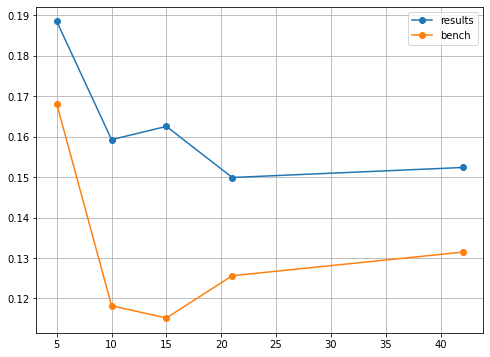

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(days, results, '-o', label='results')
plt.plot(days, bench, '-o', label='bench')
plt.legend()
plt.grid()

In [6]:
from MT5PythonScriptsExperts.connectors.connector_one import ConnectorOne
from MT5PythonScriptsExperts.symbols_info.mt5_symbols_info_interface import StocksSymbolInfoInterface

In [7]:
mt5_connector = ConnectorOne()
sci = StocksSymbolInfoInterface(mt5_terminal_connector=mt5_connector)

In [8]:
sci_admissible_symbols_year_5 = sci.compute_admissible_symbols(relative_cost_threeshold=-0.10, investing_balance=1000, in_market_days=5, cost_threeshold_in_years=True)
sci_admissible_symbols_year_10 = sci.compute_admissible_symbols(relative_cost_threeshold=-0.10, investing_balance=1000, in_market_days=10, cost_threeshold_in_years=True)
sci_admissible_symbols_year_15 = sci.compute_admissible_symbols(relative_cost_threeshold=-0.10, investing_balance=1000, in_market_days=15, cost_threeshold_in_years=True)
sci_admissible_symbols_year_21 = sci.compute_admissible_symbols(relative_cost_threeshold=-0.10, investing_balance=1000, in_market_days=21, cost_threeshold_in_years=True)
sci_admissible_symbols_year_42 = sci.compute_admissible_symbols(relative_cost_threeshold=-0.10, investing_balance=1000, in_market_days=42, cost_threeshold_in_years=True)

In [9]:
ref_costs = {5: sci_admissible_symbols_year_5.relative_total_costs_one_year.iloc[0:100].mean(),
             10: sci_admissible_symbols_year_10.relative_total_costs_one_year.iloc[0:100].mean(),
             15: sci_admissible_symbols_year_15.relative_total_costs_one_year.iloc[0:100].mean(),
             21: sci_admissible_symbols_year_21.relative_total_costs_one_year.iloc[0:100].mean(),
             42: sci_admissible_symbols_year_42.relative_total_costs_one_year.iloc[0:100].mean(),
            }
ref_costs_values = np.array(list(ref_costs.values()))

In [15]:
print(pd.Series(ref_costs), "\n")
print(pd.Series(results + ref_costs_values), "\n")
print(pd.Series(bench + ref_costs_values), "\n")

5    -0.068116
10   -0.047008
15   -0.039972
21   -0.035952
42   -0.030926
dtype: float64 

0    0.120365
1    0.112264
2    0.122567
3    0.113954
4    0.121455
dtype: float64 

0    0.100003
1    0.071187
2    0.075205
3    0.089669
4    0.100527
dtype: float64 



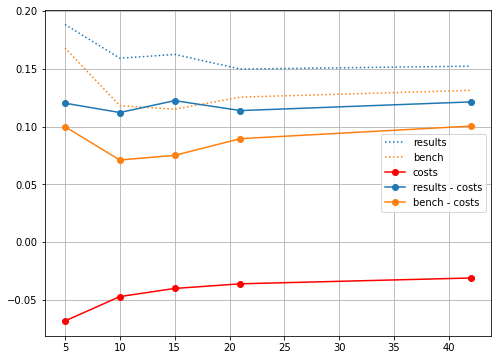

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(days, results, ':', label='results', color='tab:blue')
plt.plot(days, bench, ':', label='bench' , color='tab:orange')
plt.plot(days, ref_costs_values, '-o', label='costs', color='r')
plt.plot(days, results + ref_costs_values, '-o', label='results - costs', color='tab:blue')
plt.plot(days, bench + ref_costs_values, '-o', label='bench - costs', color='tab:orange')
plt.legend()

plt.grid()

In [16]:
ref_costs_min = {5: sci_admissible_symbols_year_5.relative_total_costs_one_year.iloc[0:100].min(),
             10: sci_admissible_symbols_year_10.relative_total_costs_one_year.iloc[0:100].min(),
             15: sci_admissible_symbols_year_15.relative_total_costs_one_year.iloc[0:100].min(),
             21: sci_admissible_symbols_year_21.relative_total_costs_one_year.iloc[0:100].min(),
             42: sci_admissible_symbols_year_42.relative_total_costs_one_year.iloc[0:100].min(),
            }
ref_costs_values_min = np.array(list(ref_costs_min.values()))

ref_costs_max = {5: sci_admissible_symbols_year_5.relative_total_costs_one_year.iloc[0:100].max(),
             10: sci_admissible_symbols_year_10.relative_total_costs_one_year.iloc[0:100].max(),
             15: sci_admissible_symbols_year_15.relative_total_costs_one_year.iloc[0:100].max(),
             21: sci_admissible_symbols_year_21.relative_total_costs_one_year.iloc[0:100].max(),
             42: sci_admissible_symbols_year_42.relative_total_costs_one_year.iloc[0:100].max(),
            }
ref_costs_values_max = np.array(list(ref_costs_max.values()))

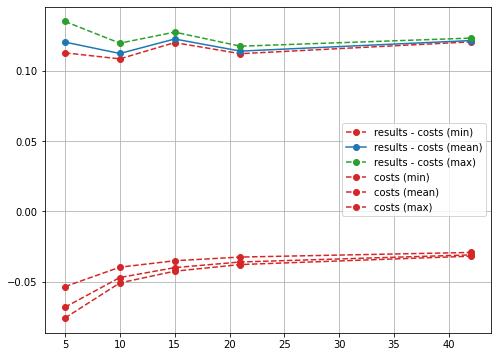

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(days, results + ref_costs_values_min, '--o', label='results - costs (min)', color='tab:red')
plt.plot(days, results + ref_costs_values, '-o', label='results - costs (mean)', color='tab:blue')
plt.plot(days, results + ref_costs_values_max, '--o', label='results - costs (max)', color='tab:green')

plt.plot(days, ref_costs_values_min, '--o', label='costs (min)', color='tab:red')
plt.plot(days, ref_costs_values, '--o', label='costs (mean)', color='tab:red')
plt.plot(days, ref_costs_values_max, '--o', label='costs (max)', color='tab:red')
plt.legend()

plt.grid()

In [12]:
# TODO: admissile symbols size per treshold